# COGS 118A - Project Checkpoint

# Names

- Andy Chow
- Naomi Chin
- Andrew Lona
- Jiaqi Liu

# Abstract 

This project aims to make a model that can find the underlying factors that contribute to a person's financial health and how different demographics may affect the financial health. We will be using the UCI bank marketing data set to obtain demographic information. We will be using Support Vector Machine model and K Nearest Neighbors multiclass classification to predict bank account balances, with the possibly of using Principle Component Analysis to determine the most significant contributors to financial status. We will be using confusion matrix, F1 score, ROC-AUC score, learning curve, and AIC and BIC score comparison to evaluate model performance.

# Background

Making money and having a large bank account balance is a goal that many strive for. But what factors contribute to how much money people have in their accounts? There's the obvious job type and age that typically have an impact on salary and thus bank account balnce, but what other attributes have an influence, and to what degree?

There have been studies on how different demographics affect salary or bank account balance. For example, an article by ValuePenguin breaks down how income and age affect balances. Unsuprisingly, as income increases, the average balance increases. In addition, balance increases as age increases up to the 65-74 age range, but after 75+ years, the average balance decreases <a name="moon"></a>[<sup>[1]</sup>](#moonnote).
There are also a multitude of studies that have looked at how different personal attributes affect earnings. While earnings are not exactly bank account balance, we have already seen how income affect the balance. A report by Social Security found that men with bachelor's degrees earn about \\$900,000 more during their lifetime than men with only high school diplomas. For women, the difference is about \\$630,000. The report then took into account certain socio-demographic variables that could influence earnings; after recalculations, men and women with bachelor's  degrees earn \\$655,000 and \\$450,000, repectively, more than their high school graduate counterparts <a name="social"></a>[<sup>[2]</sup>](#socialnote). Further, Social Security looks into how savings are affected by marital status. It was found that married people were much more likely to have an individual retirement account (IRA) or defined contribution (DC). This likely means that married people are better at saving money due to multiple reasons. Cost sharing, long term commitment, and future-focused behavior may be contributers to this behavior <a name="relationship"></a>[<sup>[3]</sup>](#relationshipnote).

We are going to analyze not only what attributes collectively contribute to bank account balance, but also how much influence each attribute has. The goal of our research and analysis is to find what demographics and lifestyle choices correlate to bank account balances. While the results of this research are intended to be informative knowledge, they could serve as guidance to increase bank account balance. This information could also be used for banks to determine what clients to focus on.

# Problem Statement

### TODO: PLS CHANGE

The problem we hope to solve is, how well can a person’s demographic information predict their financial health? In context, how well does a person’s age, job type, marital status, education level, credit in default status, housing loan holder status, and loan holder status contribute towards determining a person’s financial health. Financial health in this instance is the balance of a person’s bank account which is a reasonable heuristic solution when determining financial health (high is good, low is bad). If possible, we would also hope to answer the question, which aspect of a person’s demographic information contributes the most to predicting financial health?

# Data

The data that will be used is the UCI bank marketing data set. It gives information of direct marketing campaigns of a Portuguese banking institution.

Data link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- 17 of variables, 45211 observations
- each observation consists of one marketing call from a Portuguese banking institution to assess if the bank term deposit would be subscribed (by the client). These outcomes may not always results in subscription, and follow-up calls are sometimes made to the same client.
- critical variables are
    - balance: at the moment we are acting on assumption, but it should be the current account balance of the client contacted
    - independent variables such as (numerical age, job type, marital status, education level, credit in default status, housing loan holder status, and loan holder status)
- cleaning/transformations
    - the data is pretty spotless in a wrangling sense, albeit most of the categorical variables do have an unknown or nonexistent value which will need to be accounted for.
    - we will also need to one-hot encode all categorical IVs such as marital status and job type (not dummy coding).


# Proposed Solution

### TODO: PLS CHANGE

We are interested in predicting the bank account balance of individuals given their demographic data provided by the bank. Since the accound balance variable is independent from other observations, we can convert the continuous range in to categorical bins based on quartile ranges with the addition of "below 0". We will use a Support Vector Machine model to conduct the multiple classification. In addition, preliminary observation of the target feature reveals that the mean is significantly smaller than the median, which indicates that there are outliers in the dataset. We will be using a ElasticNet regularization primarily to limit the influence of outliers in the L1 term but the L2 term also helps in reduction of the 17 present features. We will conduct a gradient descent with respect to the $\alpha$ term of the ElasticNet reglarization since we are not completely sure how much to penalize for outliers. We will also apply a simple model using K Nearest Neighbors multiclass classification, and apply a model comparison metric to evaluate performance. We will use a Confusion Matrix and ROC-AUC analysis for model benchmarking to compare the SVM and KNN models.

In addition, if the model is a well performing predictor of financial health, we will conduct a Principle Component Ananlysis to determine what features are the most significant contributors to their financial status.

We plan to use Pandas for data preprocessing, and we plan to use the modules provided in the SKLearn library to conduct our model implementation.

# Evaluation Metrics

### PLS CHANGE

We will be using confusion matrix for a simple analysis with the addition of a F1 score since neither false positive nor false negative are particularly penalizing to the final performance of the model. We will also be conducting a ROC-AUC score to compare the SVM and KNN models, which is ideal since ROC AUC can handle multiclass classifications.

We will also use a learning curve to evaluate over or underfitting of the model. Finally we will include an AIC and BIC score comparison for similar reason.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns

bank = pd.read_csv('data/bank-full.csv', sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
# Number of unknown values in the data
print('job:', bank[bank.job == 'unknown'].shape[0])
print('education:', bank[bank.education == 'unknown'].shape[0])
print('contact:', bank[bank.contact == 'unknown'].shape[0])
print('poutcome:', bank[bank.poutcome == 'unknown'].shape[0])
print('pdays:', bank[bank.pdays == -1].shape[0])  # -1 means client was not previously contacted

job: 288
education: 1857
contact: 13020
poutcome: 36959
pdays: 36954


After looking at the data, we have decided to remove the columns 'contact', 'day', 'pdays', 'poutcome'.
We also remove the columns 'duration' since it is heavily correlated with 'y'.

In [3]:
bank = bank.drop(['contact', 'day', 'pdays', 'poutcome', 'duration'], axis=1)
bank

,age,job,marital,education,default,balance,housing,loan,month,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,may,1,0,no
1,44,technician,single,secondary,no,29,yes,no,may,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,may,1,0,no
4,33,unknown,single,unknown,no,1,no,no,may,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,nov,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,nov,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,nov,4,0,no


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


<Axes: xlabel='balance', ylabel='Count'>

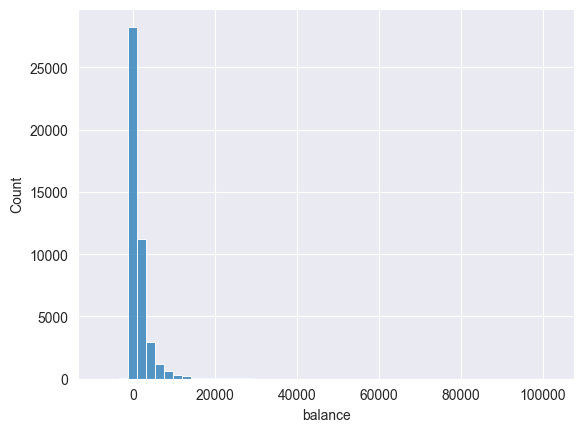

In [4]:
print(bank['balance'].describe())
sns.histplot(data=bank, x='balance', bins=50)

As the above histplot shows, the distribution of balance is very heavily right skewed, with many cluster around 0. This is not useful. Therefore, we will take the log of balance.

In [5]:
bank_poslog = np.array(bank[bank.balance > 0].balance)
bank_poslog = np.log(bank_poslog)
bank_neglog = np.array(bank[bank.balance < 0].balance)
bank_neglog = np.log(-bank_neglog)

<Axes: ylabel='Count'>

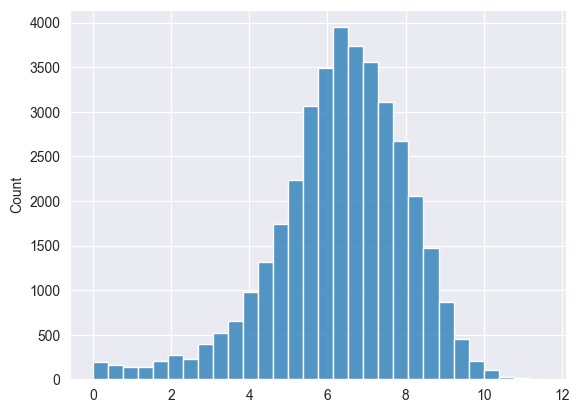

In [6]:
# plot of positive balance
sns.histplot(data=bank_poslog, bins=30)

<Axes: ylabel='Count'>

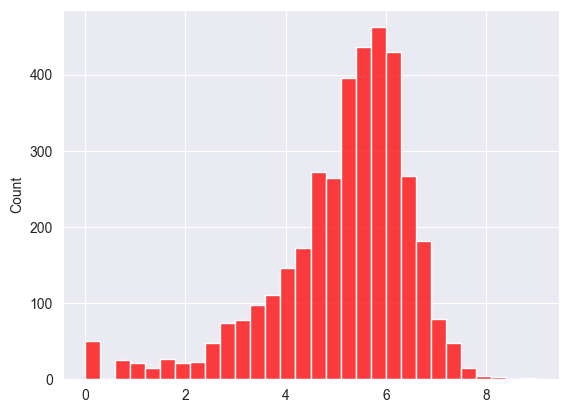

In [7]:
# plot of negative balance
sns.histplot(data=bank_neglog, color='red', bins=30)

In [8]:
bank['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

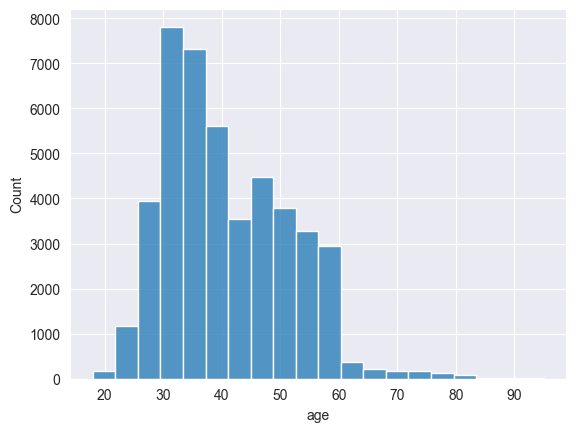

In [9]:
sns.histplot(data=bank, x='age', bins=20)

The distribution of agae is fairly normal. No processing is needed.

# Ethics & Privacy

The main concern with prediction with real life data is the accuracies of our models. We are uncertain about the predictive power of the models and whether these models should be used to help with future marketing. One can misuse the models trained and infer possibly inaccurate conclusions on bank marketing.

Furthermore, the data used are from a Portuguese banking institution and may not be similar with maketing data of banking institutions of other countries. The marketing data of other banking institutions in Portugal might also differ. The model created might not be accurate to predict marketing results of other banking institutions.

Therefore, We are careful to disclose that the models we will generate are for reference only and we by no means guarantee they are accurate in predicting the market reception on banking. One needs to be cautious using the models trianed to predict patterns, generalize, and infer conclusions on bank marketing.

# Team Expectations 

* We expect to make it to as many meetings as possible. If you cannot make it to a meeting due to scheduling conflict, notify as soon as possible (ideally 2 days before), so that other teammates can find a way to resolve the conflict.
* We expect everyone to share their ideas, thoughts and concerns on the projects. We want everyone to have an oppotunity to express their ideas. And it also helps to better evaluate the scope of the project.
* We expect everyone to share the workload of the project and make consistant updates to the project. This can help us guage how everyone is doing. If a person is falling behind, other teammates can have time to assist and make changes to the project.
* We expect everyone to handle conflict in ideas peacefully. Teammates should listen to both sides and come to an agreement without escalating the conflict.
* If a teammate is struggling and have difficulties on finishing their task, they should inform other teammates on their problems. Teammates are expected to provide assistance to one other and ensure everyone is on pace.
* All members will be agree on proposed changes before making any final changes to any parts of the project.
* If a member cannot make a deadline, other group members are expected to help to the best of their abilities without taking over the workload.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/17(Fri)  |  5 PM   | Brainstorm topics/questions | Brainstorm topics/questions |
| 2/22(Wed)  | 7:30 PM | Do background research on topic | Discuss ideal dataset(s) and ethics; finish project proposal |
| 2/25(Sat)  |  3 PM   | NA | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part |
| 2/28(Tue)  | 7:30 PM | Import & Wrangle Data ,do some EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan |
| 3/8(Wed)   | 7:30 PM | Finalize wrangling/EDA; Begin programming for project | Discuss/edit project code; Complete project |
| 3/14(Tue)  | 7:30 PM | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/22(Wed)  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="moonnote"></a>1.[^](#moon): Moon, Chris (14 Sept 2022) Average U.S. Checking Account Balance: A Demographic Breakdown. *ValuePenguin*. https://www.valuepenguin.com/banking/average-checking-account-balance.<br>
<a name="socialnote"></a>2.[^](#social): Social Security. Research, Statistics & Policy Analysis: Education and Lifetime Earnings. https://www.ssa.gov/policy/docs/research-summaries/education-earnings.html#:~:text=Men%20with%20bachelor's%20degrees%20earn,earnings%20than%20high%20school%20graduates.<br>
<a name="relationshipnote"></a>3.[^](#relationship): Social Security. Research, Statistics & Policy Analysis: The Relationship Between Retirement Savings and Marital Status Among Young Adults. https://www.ssa.gov/policy/docs/research-summaries/marital-status.html.<br>
